In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

Given the following BVP
\begin{equation}
\frac{d^2v}{dr^2} + \frac{1}{r}\frac{dv}{dr} - v + 2v^3 = 0
\end{equation}
with boundary conditions
\begin{equation}
\frac{dv}{dr}(0)=0,\quad v(\infty)=0.
\end{equation}
We seek to implement the shooting method to obtain the monotonically decaying and the one node solutions.

The BVP must be converted into an initial value problem
\begin{align}
\frac{dv}{dr}&=u\\
\frac{d^2u}{dr^2}&=-\frac{1}{r}u + v - 2v^3
\end{align}
with boundary conditions
\begin{equation}
v(0)=p,\quad \frac{dv}{dr}(0)=0.
\end{equation}

To determine a value of $p$ using the Bisection Method for the decaying solution, we need to know an approximate interval $p_\text{start}\leq p\leq p_\text{end}$ such that
\begin{equation}
\begin{cases}
v(\infty, p_\text{start})>0, \quad p_\text{start}=p\\
v(\infty, p_\text{end})<0, \quad p_\text{end}=p
\end{cases}
\end{equation}
The decaying solution will have that $v(\infty, p_\text{end})<v(\infty,p)<v(\infty, p_\text{start})$.

In [2]:
def f(v, r):
    return v[1], -(1/r)*v[1] + v[0] - 2*v[0]**3

r = np.linspace(0.001, 10, 100)

for i in np.linspace(1.5, 2, 10):
    v0 = [i, 0]
    v = odeint(f, v0, r)

    if v[-1][0] < 0:
        print('p={:.2f}, v is negative'.format(i))
    elif v[-1][0] > 0:
        print('p={:.2f}, v is positive'.format(i))

p=1.50, v is positive
p=1.56, v is positive
p=1.61, v is negative
p=1.67, v is negative
p=1.72, v is negative
p=1.78, v is negative
p=1.83, v is negative
p=1.89, v is negative
p=1.94, v is negative
p=2.00, v is negative


We observe that $p$ lies in the interval $1.56\leq p \leq 1.61$. We can now employ the Bisection Method to find $p$ such that
\begin{equation}
|p_N - p_{N-1}|<\varepsilon
\end{equation}

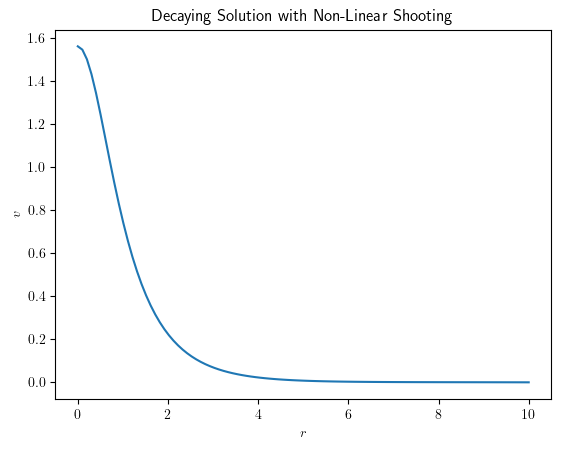

In [3]:
pstart, pend = [1.5, 2]
tol = 10**(-6)
diff = np.abs(pend - pstart)

while diff > tol:
    updated_p = (pend + pstart)/2
    v0 = [updated_p, 0]
    v = odeint(f, v0, r)

    if v[-1][0] < 0:
        pend = updated_p
    elif v[-1][0] > 0:
        pstart = updated_p

    diff = np.abs(pend - pstart)

v0 = [updated_p, 0]
v = odeint(f, v0, r)
plt.plot(r, v[:,0])
plt.xlabel(r'$r$')
plt.ylabel(r'$v$')
plt.title(r'Decaying Solution with Non-Linear Shooting')
plt.show()

To determine the one-node solution, we need to know an approximate interval $p_\text{start}\leq p\leq p_\text{end}$ such that
\begin{equation}
\begin{cases}
v(\infty, p_\text{start})<0, \quad p_\text{start}=p\\
v(\infty, p_\text{end})>0, \quad p_\text{end}=p
\end{cases}
\end{equation}
The decaying solution will have that $v(\infty, p_\text{start})<v(\infty,p)<v(\infty, p_\text{end})$.

In [4]:
for i in np.linspace(2, 2.5, 10):
    v0 = [i, 0]
    v = odeint(f, v0, r)

    if v[-1][0] < 0:
        print('p={:.2f}, v is negative'.format(i))
    elif v[-1][0] > 0:
        print('p={:.2f}, v is positive'.format(i))

p=2.00, v is negative
p=2.06, v is negative
p=2.11, v is negative
p=2.17, v is negative
p=2.22, v is negative
p=2.28, v is negative
p=2.33, v is negative
p=2.39, v is positive
p=2.44, v is positive
p=2.50, v is positive


We observe that $p$ lies in the interval $2.33\leq p \leq 2.39$. We can now employ the Bisection Method to find $p$ such that
\begin{equation}
|p_N - p_{N-1}|<\varepsilon
\end{equation}

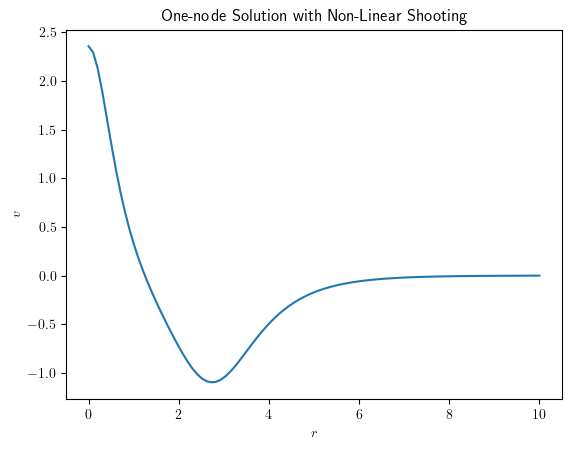

In [5]:
pstart, pend = [2.33, 2.39]
tol = 10**(-6)
diff = np.abs(pend - pstart)

while diff > tol:
    updated_p = (pend + pstart)/2
    v0 = [updated_p, 0]
    v = odeint(f, v0, r)

    if v[-1][0] > 0:
        pend = updated_p
    elif v[-1][0] < 0:
        pstart = updated_p

    diff = np.abs(pend - pstart)

v0 = [updated_p, 0]
v = odeint(f, v0, r)
plt.plot(r, v[:,0])
plt.xlabel(r'$r$')
plt.ylabel(r'$v$')
plt.title(r'One-node Solution with Non-Linear Shooting')
plt.show()